### Задание 1
Скачать данные по ссылке https://drive.google.com/file/d/1MpAdHAl727fO3oW32NO4FpSRhUBUfjfS
Считать данные с помощью pandas
Вывести на экран первые 5 строк
#### 1.1 Изучите распределение количества памяти (Memory_Amount) с помощью matplotlib
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv('laptops_10.csv')
df.sample(5)

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
66,HP,250 G6,Notebook,15.6,Intel Core i3 6006U 2GHz,4GB,AMD Radeon 520,Windows 10,1.86,438.69,Intel,500,HDD
571,HP,14-am079na (N3710/8GB/2TB/W10),Notebook,14.0,Intel Pentium Quad Core N3710 1.6GHz,8GB,Intel HD Graphics 405,Windows 10,1.94,389.00,Intel,2048,HDD
1000,Acer,Nitro 5,Gaming,15.6,Intel Core i7 7700HQ 2.8GHz,8GB,Nvidia GeForce GTX 1050,Windows 10,2.70,1260.00,Intel,128,HDD
1251,HP,255 G6,Notebook,15.6,AMD A6-Series 9220 2.5GHz,4GB,AMD Radeon R4 Graphics,Windows 10,1.86,399.00,AMD,500,HDD
380,HP,Omen 17-w212nv,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,8GB,Nvidia GeForce GTX 1050,Windows 10,3.35,1191.00,Intel,128,HDD


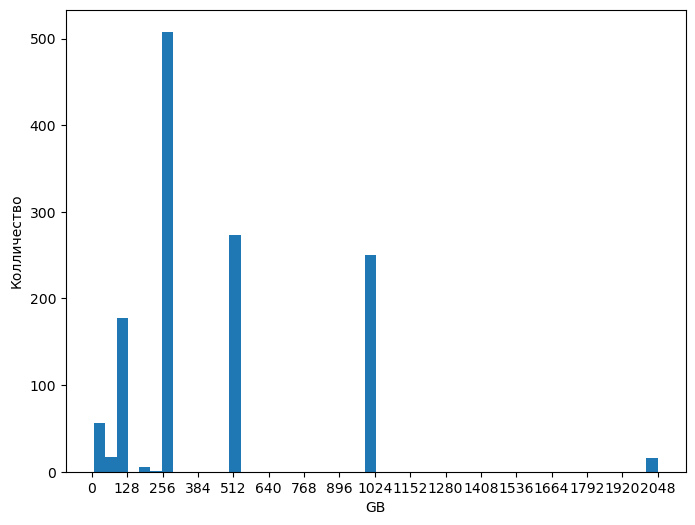

In [12]:
plt.figure(figsize=(8,6))
plt.hist(df['Memory_Amount'], bins=50)
plt.xlabel('GB')
plt.ylabel('Колличество')
plt.xticks(range(0, 2100, 128));


#### 1.2 Изучите распределение стоимости ноутбуков (Price_euros) с помощью matplotlib
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

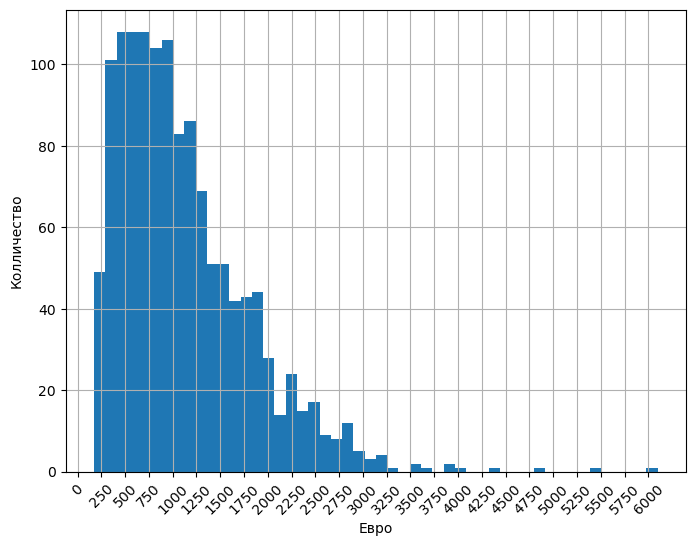

In [17]:
plt.figure(figsize=(8,6))
plt.hist(df['Price_euros'], bins=50)
plt.xlabel('Евро')
plt.ylabel('Колличество')
plt.xticks(range(0, 6100, 250), rotation=45)
plt.grid();


#### 1.3 Изучите распределение веса ноутбуков (Weight) с помощью matplotlib
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

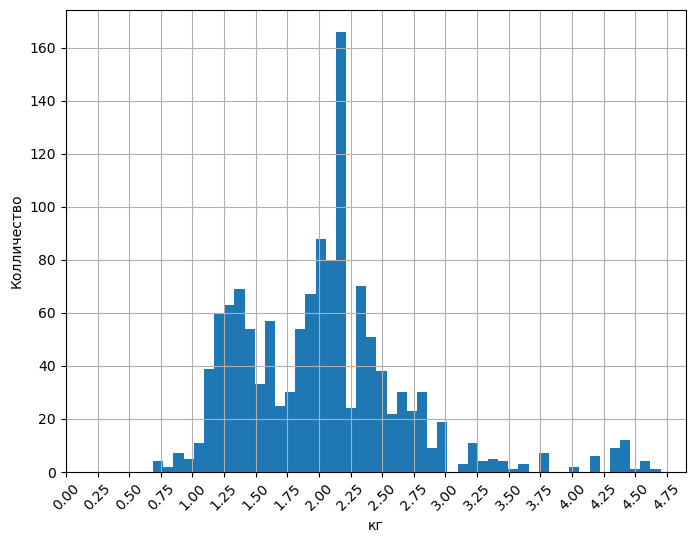

In [24]:
plt.figure(figsize=(8,6))
plt.hist(df['Weight'], bins=50)
plt.xlabel('кг')
plt.ylabel('Колличество')
plt.xticks(np.arange(0, 5, 0.25 ), rotation=45)
plt.grid();

### Задание 2.


#### 2.1 Изучите распределение типов носителя (Memory_Type)



In [28]:
memory_type = df['Memory_Type'].value_counts()
memory_type

SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: Memory_Type, dtype: int64

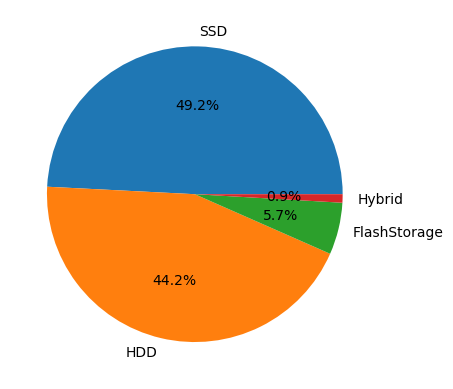

In [34]:
plt.pie(memory_type, labels=memory_type.index, autopct='%.1f%%');

#### 2.2 Изучите распределение компаний производителей (Company)


In [35]:
data_company = df['Company'].value_counts()
data_company

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

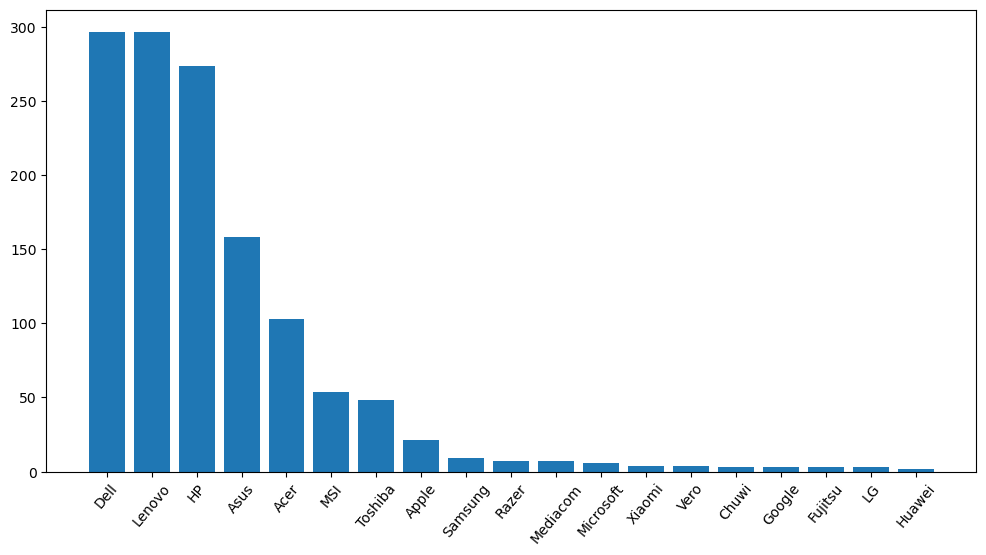

In [41]:
plt.figure(figsize=(12,6))
plt.bar(data_company.index, data_company)
plt.xticks(rotation = 50);


#### 2.3 Изучите распределение операционной системы (OpSys)


In [43]:
data_opsys = df['OpSys'].value_counts()
data_opsys

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

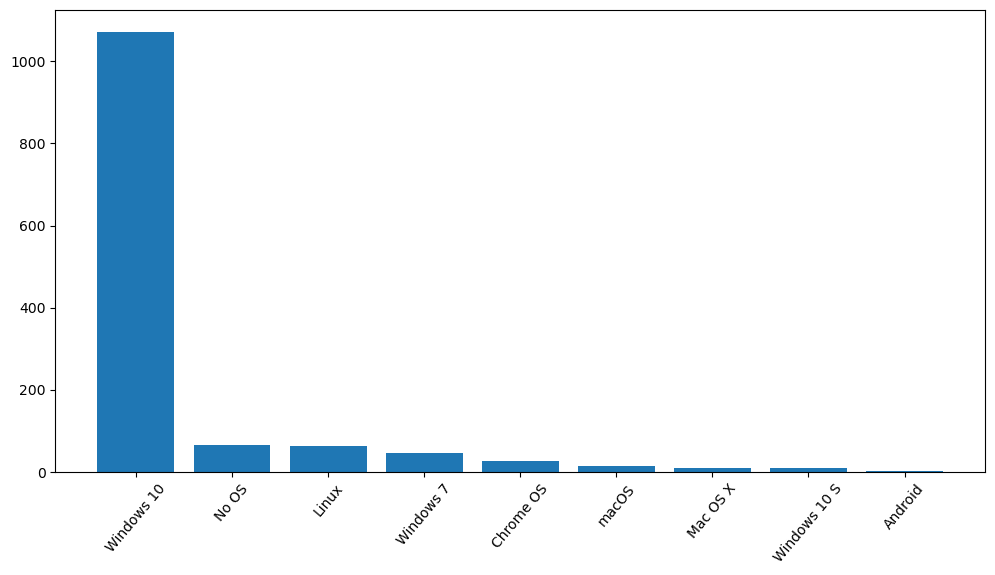

In [44]:
plt.figure(figsize=(12,6))
plt.bar(data_opsys.index, data_opsys)
plt.xticks(rotation = 50);

#### 2.4 Изучите распределение компаний производителей CPU (Cpu_Company)

In [46]:
data_cpu = df['Cpu_Company'].value_counts()
data_cpu

Intel      1240
AMD          62
Samsung       1
Name: Cpu_Company, dtype: int64

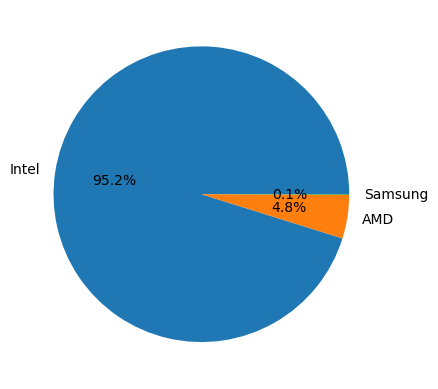

In [47]:
plt.pie(data_cpu, labels=data_cpu.index, autopct='%.1f%%');

### Задание 3
Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму
Процессоры от Samsung не изучайте



#### 3.1 Постройте график в абсолютных величинах



In [54]:
data = pd.crosstab(columns=df['Cpu_Company'],index=df['Company']).reset_index()
data.drop(columns='Samsung',inplace=True)
data

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


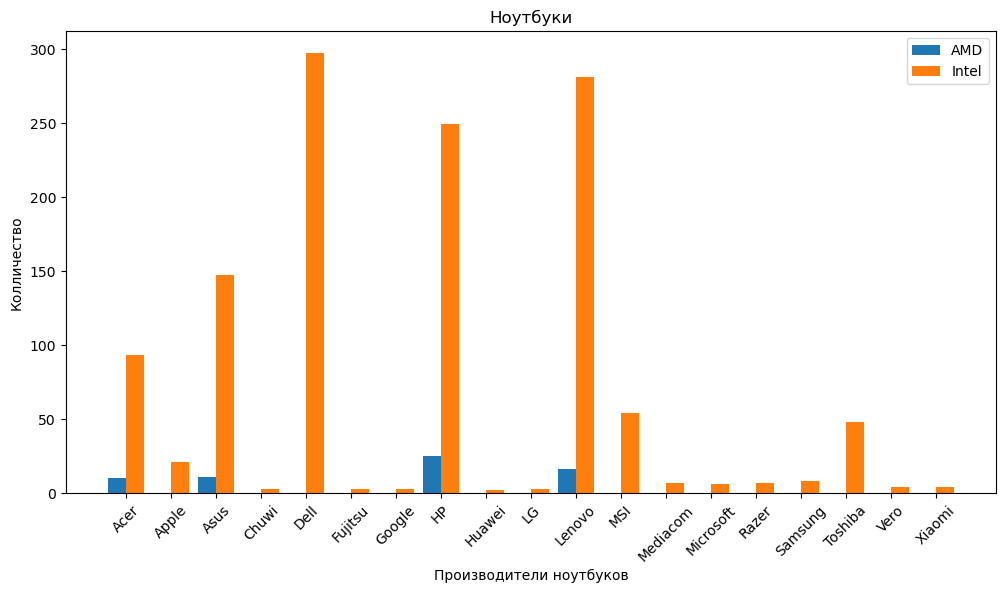

In [71]:
plt.figure(figsize=(12,6))

n_ticks = np.arange(len(data['AMD']))
print(n_ticks)
offset=0.2
w=0.4

plt.bar(n_ticks-offset, data['AMD'], width=w)
plt.bar(n_ticks+offset, data['Intel'], width=w);

plt.title('Ноутбуки')
plt.xlabel('Производители ноутбуков')
plt.ylabel('Колличество')
plt.xticks(n_ticks, data['Company'],rotation=45)
plt.legend(['AMD','Intel']);

#### 3.2 Постройте график в относительных величинах

In [84]:
data = pd.crosstab(columns=df['Cpu_Company'],index=df['Company'],normalize='index').reset_index()
data.drop(columns='Samsung',inplace=True)
data


Cpu_Company,Company,AMD,Intel
0,Acer,0.097087,0.902913
1,Apple,0.000000,1.000000
2,Asus,0.069620,0.930380
3,Chuwi,0.000000,1.000000
4,Dell,0.000000,1.000000
5,Fujitsu,0.000000,1.000000
6,Google,0.000000,1.000000
7,HP,0.091241,0.908759
8,Huawei,0.000000,1.000000
9,LG,0.000000,1.000000


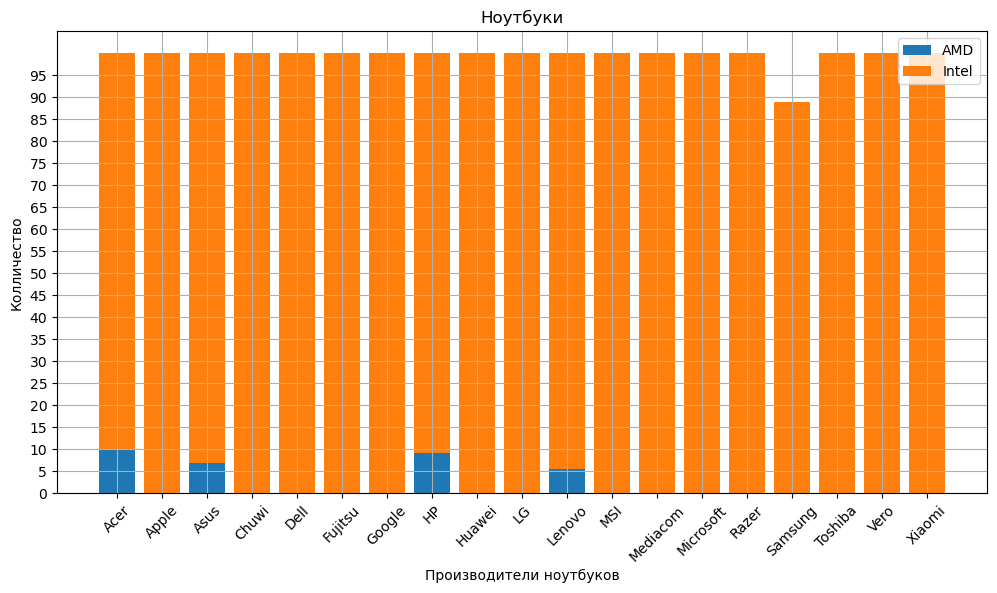

In [91]:
plt.figure(figsize=(12,6))


plt.bar(data['Company'], data['AMD'] )
plt.bar(data['Company'], data['Intel'], bottom=data['AMD'])

plt.title('Ноутбуки')
plt.xlabel('Производители ноутбуков')
plt.ylabel('Колличество')
plt.yticks(np.arange(0,1,0.05),np.arange(0,100,5))
plt.xticks(rotation=45)
plt.legend(['AMD','Intel'])
plt.grid();

### Задание 4
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

#### 4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора


In [98]:
df.sample()

# plt.figure(figsize=(8,6))
# sns.boxplot(y=df['Cpu_Company'],x=df['Price_euros']);

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
105,HP,Pavilion 14-BK001nv,Notebook,14.0,Intel Core i5 7200U 2.5GHz,6GB,Nvidia GeForce 940MX,Windows 10,1.58,659.0,Intel,256,SSD


#### 4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти


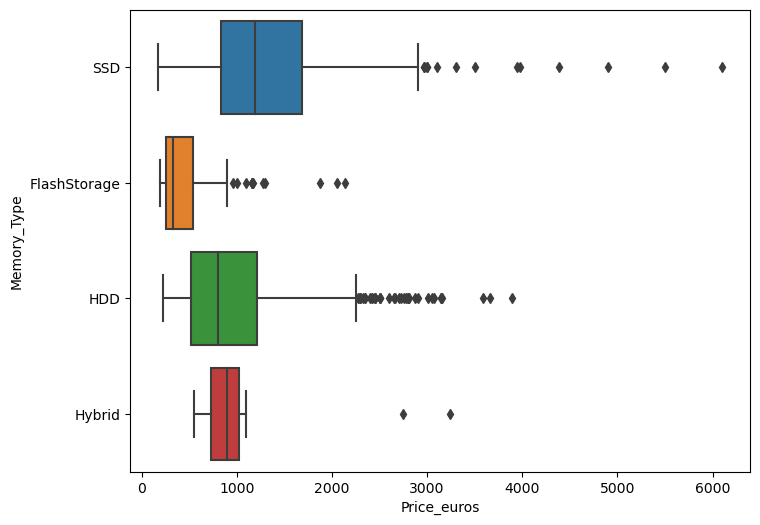

In [104]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Price_euros'],y=df['Memory_Type']);

#### 4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти


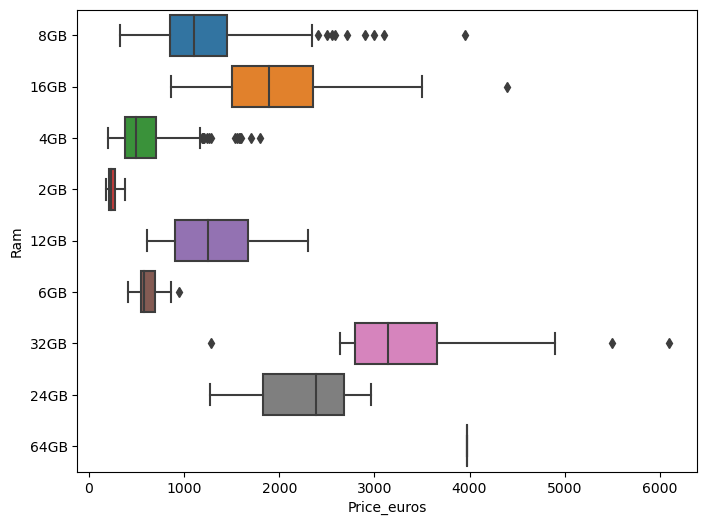

In [105]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Price_euros'],y=df['Ram']);

#### 4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя


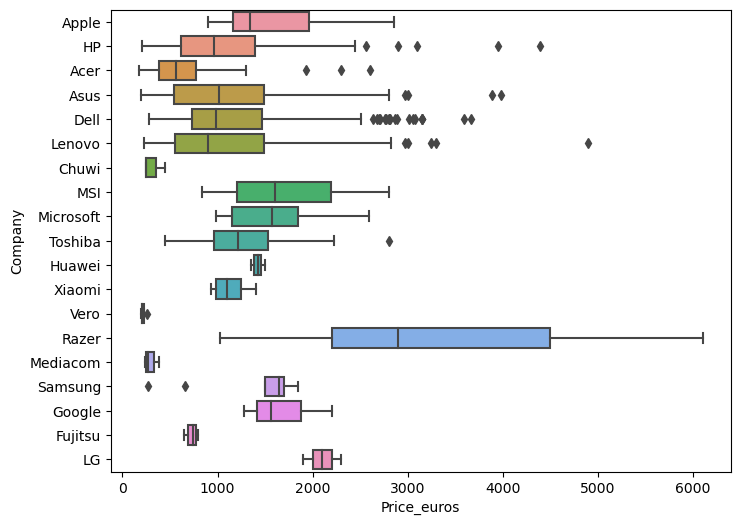

In [106]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Price_euros'],y=df['Company']);

### Задание 5
#### Постройте матрицу корреляций для таблицы

In [127]:
data_corr = df.corr().round(1)
# data_corr[np.abs(data_corr)<0.3] = 0
data_corr

C:\Users\X\AppData\Local\Temp\ipykernel_19808\1859908780.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = df.corr().round(1)


,Inches,Weight,Price_euros,Memory_Amount
Inches,1.0,0.8,0.1,0.3
Weight,0.8,1.0,0.2,0.2
Price_euros,0.1,0.2,1.0,-0.1
Memory_Amount,0.3,0.2,-0.1,1.0


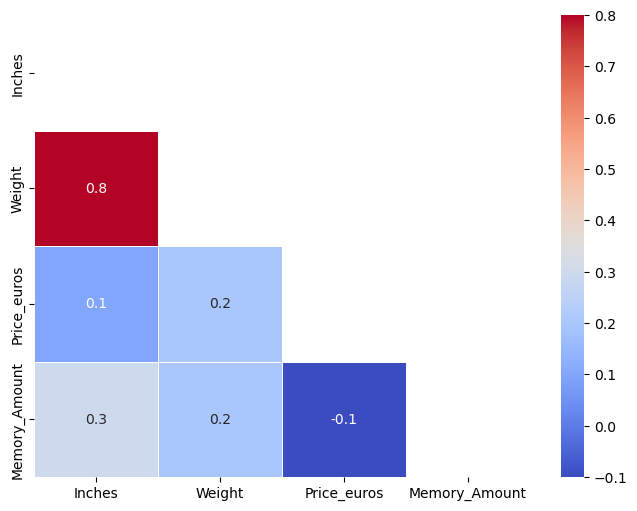

In [129]:
plt.figure(figsize=(8,6))
sns.heatmap(data_corr,annot=True, linewidths=0.5, cmap='coolwarm', mask=np.triu(data_corr));